# Machine Learning - Parte I

Vamos começar a falar sobre os algoritmos de machine learning, começando por um de regressão. <br>
Regressão linear é um algoritmo largamente utilizado, tendo já completado dois séculos de existência desde que sua primeira forma de utilização foi publicada no começo do século XIX.

Apesar de não ser o que conduz ao melhor modelo, daremos os primeiros passos para entender:

* métricas de desempenho de modelos, ou seja como comparar modelos
* estratégias de validação: separação entre treino e teste


Além disso, introduziremos uma notação comum a todos os algoritmos da seguinte maneira:

* $X$ : matriz de features
* $y$ : vetor com os objetivos da predição


# Regressão

***

***
<div class="span5 alert alert-info">

<p> Fornecidos $x$ and $y$, o objetivo da regressão linear é: </p>
<ul>
  <li> Criar um <b>modelo preditivo</b> para predizer o $y$ a partir de $x_i$</li>
  <li> Modelar a <b>importancia</b> entre cada variável dependente $x_i$ e $y$</li>
    <ul>
      <li> Nem todos os $x_i$ tem relação com $y$</li>
      <li> Quais $x_i$ que mais contribuem para determinar $y$? </li>
    </ul>
</ul>
</div>

### recap
***

[Regressão Linear](http://en.wikipedia.org/wiki/Linear_regression) é um metodo para modelar a relação entre um conjunto de variaveis independentes $x$ (explanatórias, features, preditores) e uma variável dependente $Y$.  Esse metodo assume que $x$ tem uma relação linear com $y$.  

$$ y = \beta_0 + \beta_1 x + \epsilon$$

one $\epsilon$ refere-se a um erro. 

* $\beta_0$ é a intercepto do modelo

* O objetivo será estimar os coeficientes (e.g. $\beta_0$ and $\beta_1$). Representamos as estimativas com o "chapeu" em cima da letra. 

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Uma vez obtido a estimativa dos coeficientes $\hat{\beta}_0$ and $\hat{\beta}_1$, podemos usar para predizer novos valores de $Y$

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Regressão Linear Multipla é quando há mais de uma variavel independente
    * $x_1$, $x_2$, $x_3$, $\ldots$

$$ y = \beta_0 + \beta_1 x_1 + \ldots + \beta_p x_p + \epsilon$$ 

In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [9]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

#### Importando o dataset:

In [10]:
boston = load_boston()

In [11]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### Carregando o dataframe

In [12]:
# carregando o df
boston_df = pd.DataFrame(boston.data)

# nome das colunas
boston_df.columns = boston.feature_names

#### Explorando o dataframe

In [13]:
boston_df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
345,0.03113,0.0,4.39,0.0,0.442,6.014,48.5,8.0136,3.0,352.0,18.8,385.64,10.53
80,0.04113,25.0,4.86,0.0,0.426,6.727,33.5,5.4007,4.0,281.0,19.0,396.90,5.29
363,4.22239,0.0,18.10,1.0,0.770,5.803,89.0,1.9047,24.0,666.0,20.2,353.04,14.64
102,0.22876,0.0,8.56,0.0,0.520,6.405,85.4,2.7147,5.0,384.0,20.9,70.80,10.63
443,9.96654,0.0,18.10,0.0,0.740,6.485,100.0,1.9784,24.0,666.0,20.2,386.73,18.85


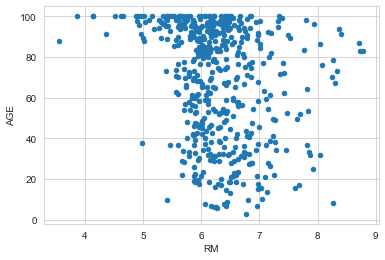

In [14]:
boston_df.plot(kind='scatter', x = 'RM', y = 'AGE')

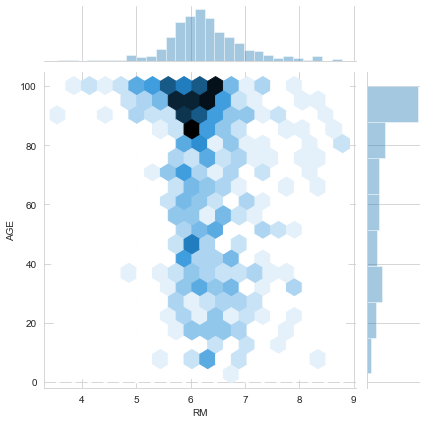

In [15]:
sns.jointplot(data=boston_df, x = 'RM', y = 'AGE', kind = 'hex')

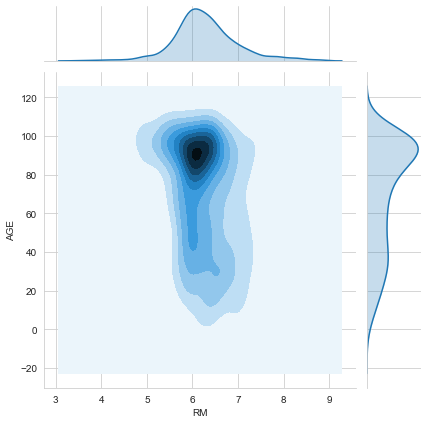

In [16]:
sns.jointplot(data=boston_df, x = 'RM', y = 'AGE', kind = 'kde')

In [17]:
# introduzindo a coluna de precos
boston_df['Preco'] = boston.target

In [18]:
boston_df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Preco
159,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39,23.3
439,9.39063,0.0,18.10,0.0,0.740,5.627,93.9,1.8172,24.0,666.0,20.2,396.90,22.88,12.8
291,0.07886,80.0,4.95,0.0,0.411,7.148,27.7,5.1167,4.0,245.0,19.2,396.90,3.56,37.3
467,4.42228,0.0,18.10,0.0,0.584,6.003,94.5,2.5403,24.0,666.0,20.2,331.29,21.32,19.1
256,0.01538,90.0,3.75,0.0,0.394,7.454,34.2,6.3361,3.0,244.0,15.9,386.34,3.11,44.0


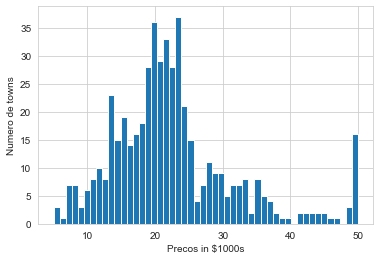

In [19]:
# Histograma dos preços (alvo da predição)
plt.hist(boston_df['Preco'], bins = 50);

# Nome dos eixos
plt.xlabel('Precos in $1000s');
plt.ylabel('Numero de towns');

In [20]:
boston_df_sample = boston_df.sample(frac = 0.1)

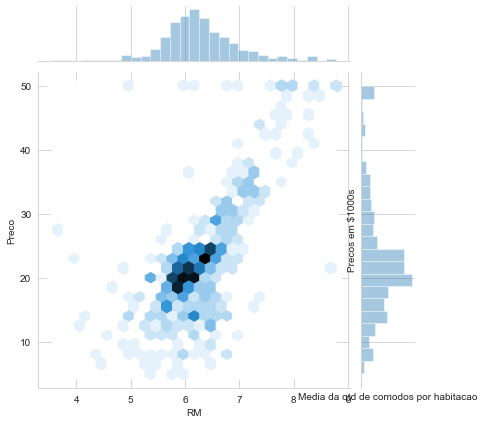

In [21]:
# Plotando a coluna #5 (RM)
# plt.scatter(boston_df['RM'], boston_df['Preco'])

sns.jointplot(data = boston_df, x = 'RM', y = 'Preco', kind = 'hex');

#label
plt.ylabel('Precos em $1000s');
plt.xlabel('Media da qtd de comodos por habitacao');

### Problema de negócio: Quero predizer o preço.

#### Se eu tivesse somente uma feature...
(e usando scipy)

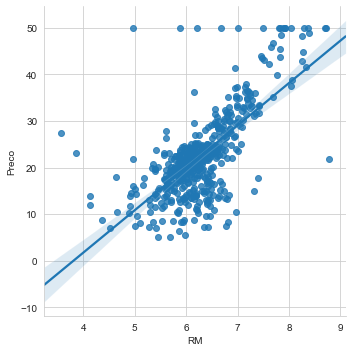

In [22]:
# como seria...
sns.lmplot('RM', 'Preco', data=boston_df, fit_reg=True)

In [21]:
# Tentem isso tambem...
# sns.jointplot('RM', 'Preco', data=boston_df, kind = 'reg')

#### Objetivo: encontrar os "melhores" $a$ e $b$ 

$y = a.x + b$

onde

* $y$ : preço
* $x$ : qtd média de quartos

In [23]:
from scipy import stats
import numpy as np
X = boston_df.RM
y = boston_df.Preco
a, b, r_value, p_value, std_err = stats.linregress(X,y)

inclinacao, intercepto = a, b  

In [24]:
print (inclinacao)
print (intercepto)

9.102108981180306
-34.67062077643854


In [25]:
quartos = np.array(X)
precos = np.array(y)

pred = a * quartos + b 


In [31]:
# RMSE
rmse = np.sqrt(np.mean((pred - precos) ** 2))
print ('RMSE =', rmse)

RMSE = 6.603071389222561


In [32]:
np.sqrt(np.mean((pred - precos) ** 2))

6.603071389222561

Uma interpretação do RMSE

In [29]:
r = 6
p = a * r + b

print ('Para uma cidade (town) cuja media de comodos é', r, 'comodos...')
print ('o preço previsto será %.2f, e ...'% p)
print ('... em 68%% das observações, o preco fica entre %.2f e %.2f.' % (p - rmse, p + rmse))
print ('... em 95%% das observações, o preco fica entre %.2f e %.2f.' % (p - 2*rmse, p + 2*rmse))

Para uma cidade (town) cuja media de comodos é 6 comodos...
o preço previsto será 19.94, e ...
... em 68% das observações, o preco fica entre 13.34 e 26.55.
... em 95% das observações, o preco fica entre 6.74 e 33.15.


#### Como encontrar os "melhores" $a$ e $b$?
** => Metodo dos minimos quadrados **

In English: Least Squares Method.<br>
Como seaborn encontra a linha acima?

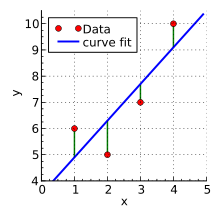

In [33]:
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png'
Image(url)

Pergunta: qual a melhor linha azul que representa o conjunto de pontos vermelhos? <br>
Resposta: a que minimiza a soma dos quadrados das linhas verdes (o erro)

\begin{equation*}
MSE\quad = \frac { 1 }{ n } \sum _{ i=0 }^{ n-1 }{ { { (\hat { { y }^{ (i) } }  } }-{ y }^{ (i) })^{ 2 } }   \quad 
\end{equation*}

\begin{equation*}
RMSE\quad = \sqrt { \frac { 1 }{ n } \sum _{ i\quad =\quad 0 }^{ n-1 }{ { { (\hat { { y }^{ (i) } }  } }-{ y }^{ (i) })^{ 2 } }   } \quad  
\end{equation*}

#### agora com multiplas variáveis

In [35]:
# primeira observação:
boston_df.iloc[0]

CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
Preco       24.00000
Name: 0, dtype: float64

Notação:

$x^{(0)}_{CRIM} = 0.00632$

$x^{(0)}_{ZN} = 18.00000$

$x^{(0)}_{LSTAT} = 4.98$

$y^{(0)} = 24$

A principal "jogada" da regressão linear é considerar que cada feature contribui linearmente na composição do preço:

$\hat{y^{(i)}} = a_{CRIM}.x^{(i)}_{CRIM} + a_{ZN}.x^{(i)}_{ZN} + ... + a_{LSTAT}.x^{(i)}_{LSTAT} + b$, <br>

para $i = 0, 1, 2,..., n-1$ 

e o objetivo será encontrar $a_{CRIM}, a_{ZN}, ...,a_{LSTAT}, b$ que minimizam o erro 

Numa forma matricial, podemos re-escrever o problema da seguinte maneira:


\begin{equation*}
\mathbf{X}.\mathbf{a} = \hat{\mathbf{y}}
\end{equation*}

<br>


\begin{equation*}
\mathbf{X} =  \begin{bmatrix}
x^{(0)}_{CRIM} & x^{(0)}_{ZN} & ... & x^{(0)}_{LSTAT} & 1 \\
x^{(1)}_{CRIM} & x^{(1)}_{ZN} & ... & x^{(1)}_{LSTAT} & 1 \\
... & ... & ... & ...\\
x^{(n-1)}_{CRIM} & x^{(n-1)}_{ZN} & ... & x^{(n-1)}_{LSTAT} & 1 \\
\end{bmatrix}
\end{equation*}

<br>

\begin{equation*}
\mathbf{a} =  \begin{bmatrix}
a_{CRIM} \\
a_{ZN} \\
... \\
a_{LSTAT}\\
b \\
\end{bmatrix}
\end{equation*}

<br>

\begin{equation*}
\mathbf{y} =  \begin{bmatrix}
\hat{y^{(0)}} \\
\hat{y^{(1)}} \\
... \\
\hat{y^{(n-1)}}\\
\end{bmatrix}
\end{equation*}

#### Engenharia e seleção de features... 

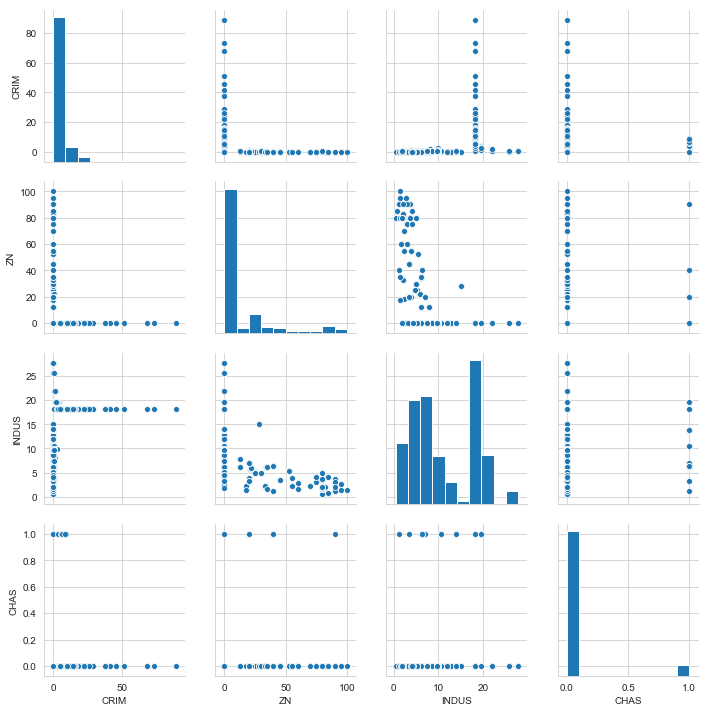

In [36]:
sns.pairplot(data=boston_df.iloc[:,:4])

In [37]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Preco'],
      dtype='object')

### treinamento e predição com sklearn começam aqui...

In [34]:
# Regressão linear - sklearn
import sklearn
from sklearn.linear_model import LinearRegression

In [36]:
lreg = LinearRegression()

Funções utilizadas:

* `lreg.fit()` : para treinar o modelo

* `lreg.predict()` : predição do valor, segundo um modelo treinado

* `lreg.score()` : retorna o coeficiente de determinação (R^2), uma medida de quão bem o modelo captura as observações. 

In [38]:
# Separando as matrizes X (features) e y (labels)

X = boston_df.drop('Preco', axis = 1)
y = boston_df.Preco

In [41]:
lreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
lreg.intercept_

36.45948838508978

In [43]:
lreg.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [44]:
print ('Valor do coeficiente b, tambem chamado de intercept:', lreg.intercept_)

Valor do coeficiente b, tambem chamado de intercept: 36.45948838508978


In [45]:
# Vamos agora ver os coeficientes:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

# coluna com os coeficientes
coeff_df["Estimativa dos coeficientes"] = pd.Series(lreg.coef_)

# mostra coeficientes
coeff_df

,Features,Estimativa dos coeficientes
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


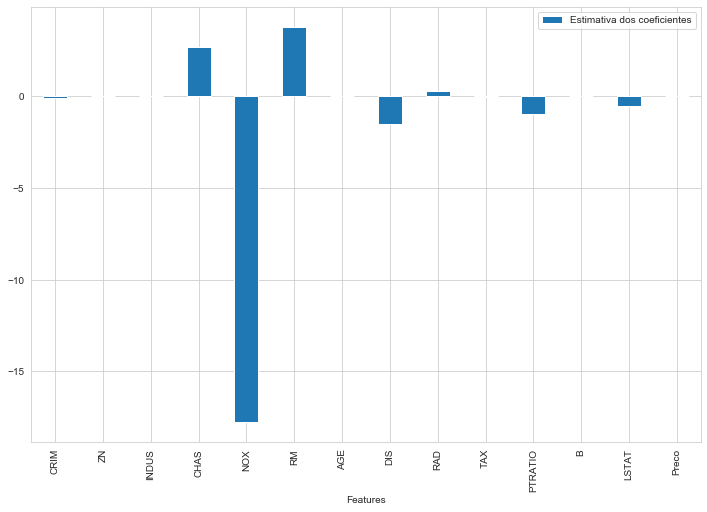

In [46]:
coeff_df.set_index('Features').plot(kind = 'bar', figsize = (12, 8))

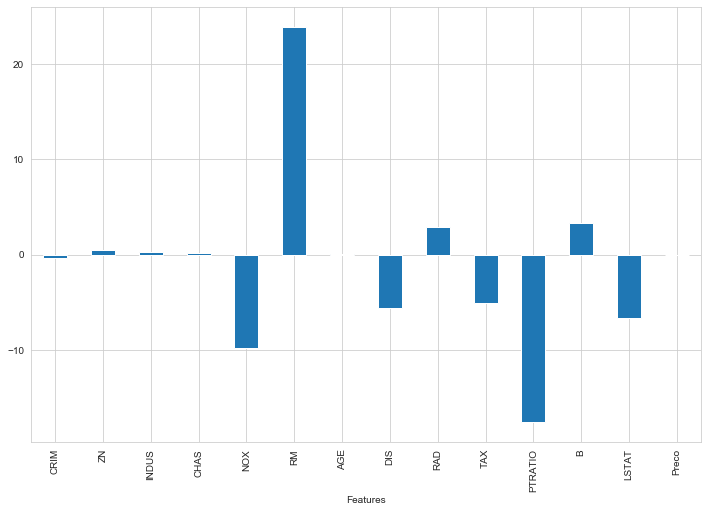

In [47]:
# calibrando os coeficientes pelo valor medio da variavel

coeff_df.set_index('Features', inplace = True)

coeff_df = pd.concat([coeff_df, boston_df.mean()], axis = 1).rename(columns = {0: 'media'})

coeff_df['coef_vezes_media'] = coeff_df['Estimativa dos coeficientes'] * coeff_df.media

coeff_df.coef_vezes_media.plot(kind = 'bar', figsize = (12, 8))

In [50]:
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Preco
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [49]:
#lreg = LinearRegression()
#lreg.fit(X, y)
lreg.predict(X)

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

In [51]:
print("Treinei com X: RMSE com y: %.2f"  
      % np.sqrt(np.mean((y - lreg.predict(X)) ** 2)))

Treinei com X: RMSE com y: 4.68


In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
np.sqrt(mean_squared_error(y, lreg.predict(X)))

4.679191295697281

## Treinamento e Validação

### Objetivo de separar os dados em treinamento e teste
***
<div class="span5 alert alert-info">

<p> No exemplo acima: </p>
<ul>
  <li> Treinamos e testamos na mesma base </li>
  <li> É esperado que as predições sobre essa base sejam boas, mas e quanto a novos dados? </li>
    <ul>
      <li> sim novos dados</li>
    </ul>
  <li> Um solução seria repartir dados, reservando uma parte para <b>teste</b> e <b>treinando</b> o modelo no restante </li>
  <li> isso se chama validação cruzada </li>  
</ul>
</div>

***

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
# Repartindo o dados em treinamento e validação
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      random_state = 999, test_size = 0.25)

In [46]:
# quais são os shapes de cada parte
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(379, 13) (127, 13) (379,) (127,)


In [56]:
set(X_train.index) & set(X_valid.index)

set()

#### Predição de preços

In [57]:
# recriando o objeto 
lreg = LinearRegression()

# treinando de novo, mas somente com os dados de treinamento
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
# Predição das observações de validação
pred_train = lreg.predict(X_train)
pred_valid = lreg.predict(X_valid)

In [59]:
print("Treinei com X_train: RMSE com y_train: %.2f"  
      % np.sqrt(np.mean((y_train - pred_train) ** 2)))
    
print("Treinei com X_train, RMSE sobre X_valid e y_valid: %.2f"  
      % np.sqrt( np.mean((y_valid - pred_valid) ** 2)) )

Treinei com X_train: RMSE com y_train: 4.70
Treinei com X_train, RMSE sobre X_valid e y_valid: 4.78


In [56]:
# R^2 desse fit
lreg.score(X_valid, y_valid)

0.6685328531438204

### Referencias

* Link para os modulos de machine learning: [SciKit Learn](http://scikit-learn.org/stable/)
* Curso Machine Learning Andrew Ng: [Coursera](https://www.coursera.org/learn/machine-learning)
* Curso Data Analysis Jose Portilla: [Udemy](https://www.udemy.com/learning-python-for-data-analysis-and-visualization/learn/v4/t/lecture/2338236?start=0)
* Curso CS109 Harvard: [Harvard](http://cs109.github.io/2015)